In [1]:
import pandas as pd
import numpy as np
%run HelperFunctions.ipynb
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

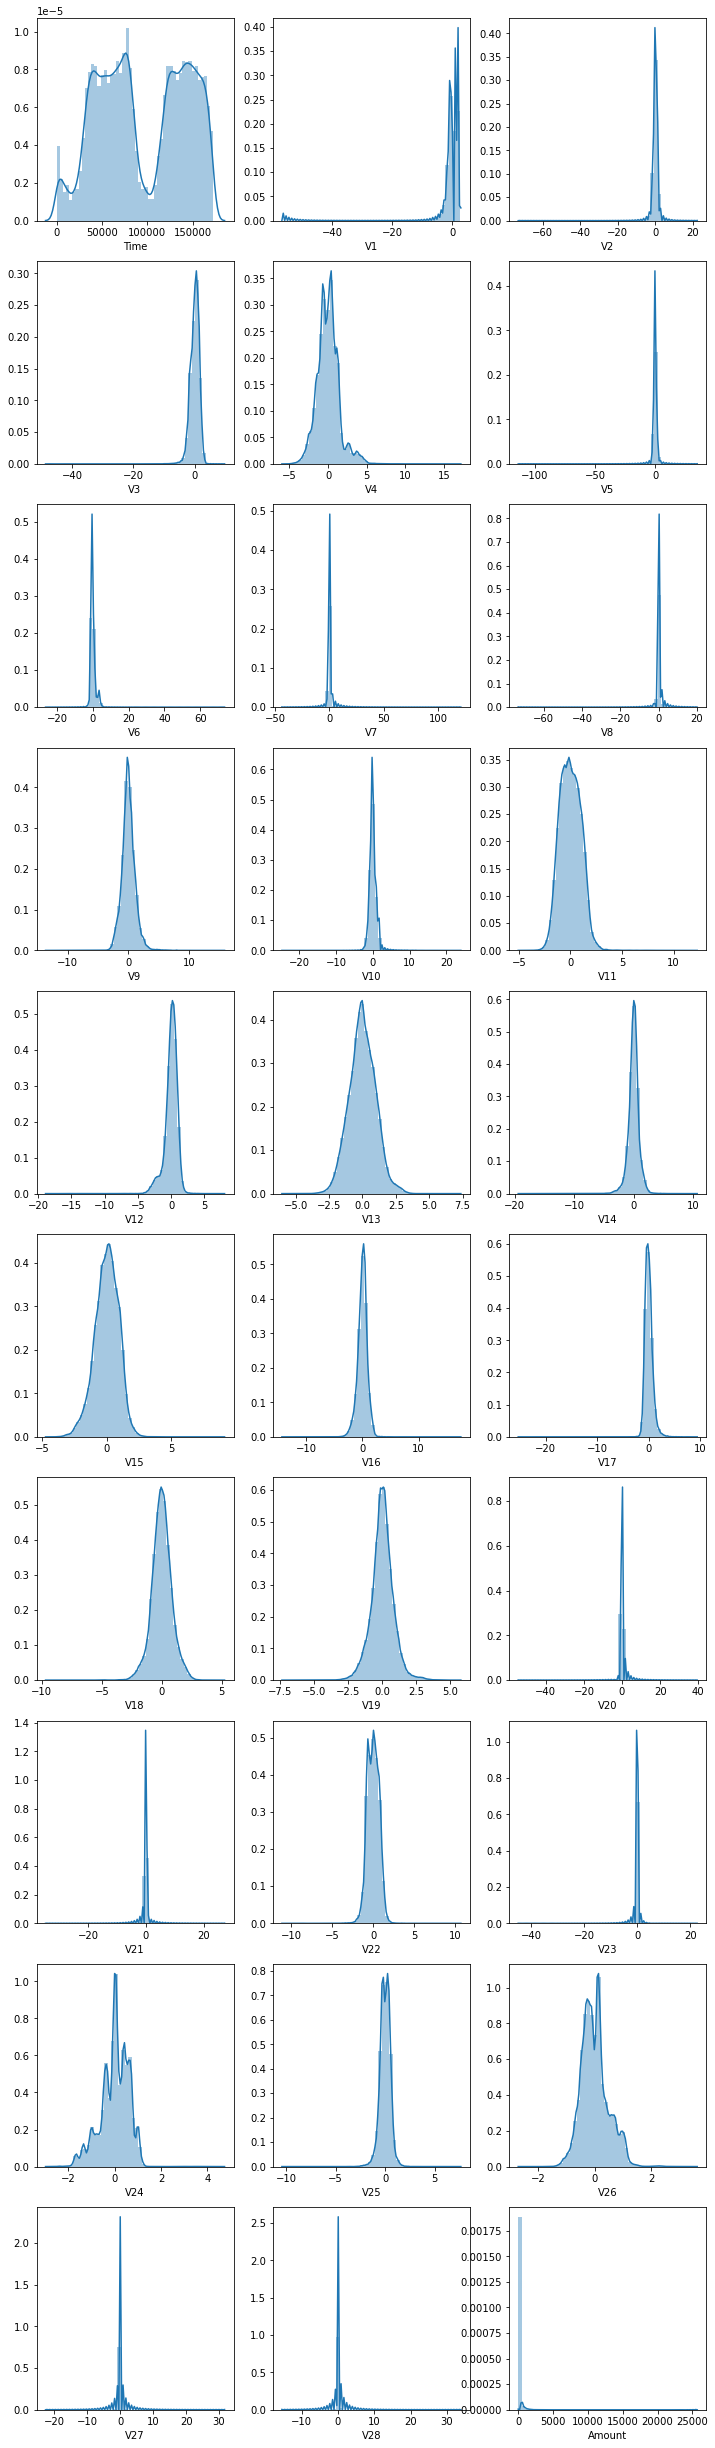

In [4]:
graph_features()

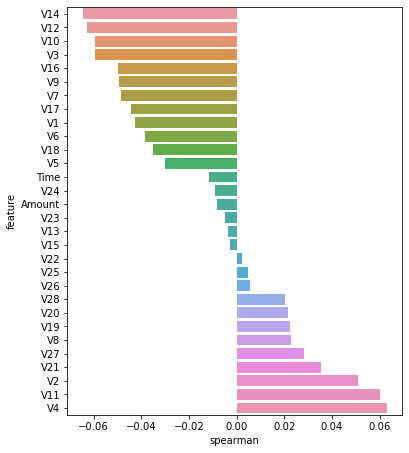

In [5]:
show_corr()

In [6]:
for col in df.columns:
    print(np.var(df[col]))

2255116088.1243014
3.8364757815610053
2.7268104503811483
2.299021168490917
2.0046767827603227
1.9050743577797935
1.7749400245019
1.5303951971990992
1.4264738475336076
1.206988229542206
1.1855896488198128
1.0418514268309738
0.9983999112951588
0.9905673151089174
0.9189023195064124
0.837800459457318
0.7678164267286077
0.7213709148809011
0.7025368914993104
0.6626596101863265
0.5943233072317992
0.539523633333278
0.5266409057048467
0.3899492915994543
0.36680708284855196
0.2717298727392889
0.23254207582578362
0.16291861895803414
0.1089545787215112
62559.849388558934
0.0017245014240160359


In [7]:
from sklearn.preprocessing import StandardScaler

# for col in df.columns:
#     if col != 'Class':
#         df[col] = StandardScaler().fit_transform(df[[col]])

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])

for col in df.columns:
    print(np.var(df[col]))

0.9999999999999998
3.8364757815610053
2.7268104503811483
2.299021168490917
2.0046767827603227
1.9050743577797935
1.7749400245019
1.5303951971990992
1.4264738475336076
1.206988229542206
1.1855896488198128
1.0418514268309738
0.9983999112951588
0.9905673151089174
0.9189023195064124
0.837800459457318
0.7678164267286077
0.7213709148809011
0.7025368914993104
0.6626596101863265
0.5943233072317992
0.539523633333278
0.5266409057048467
0.3899492915994543
0.36680708284855196
0.2717298727392889
0.23254207582578362
0.16291861895803414
0.1089545787215112
1.0000000000000002
0.0017245014240160359


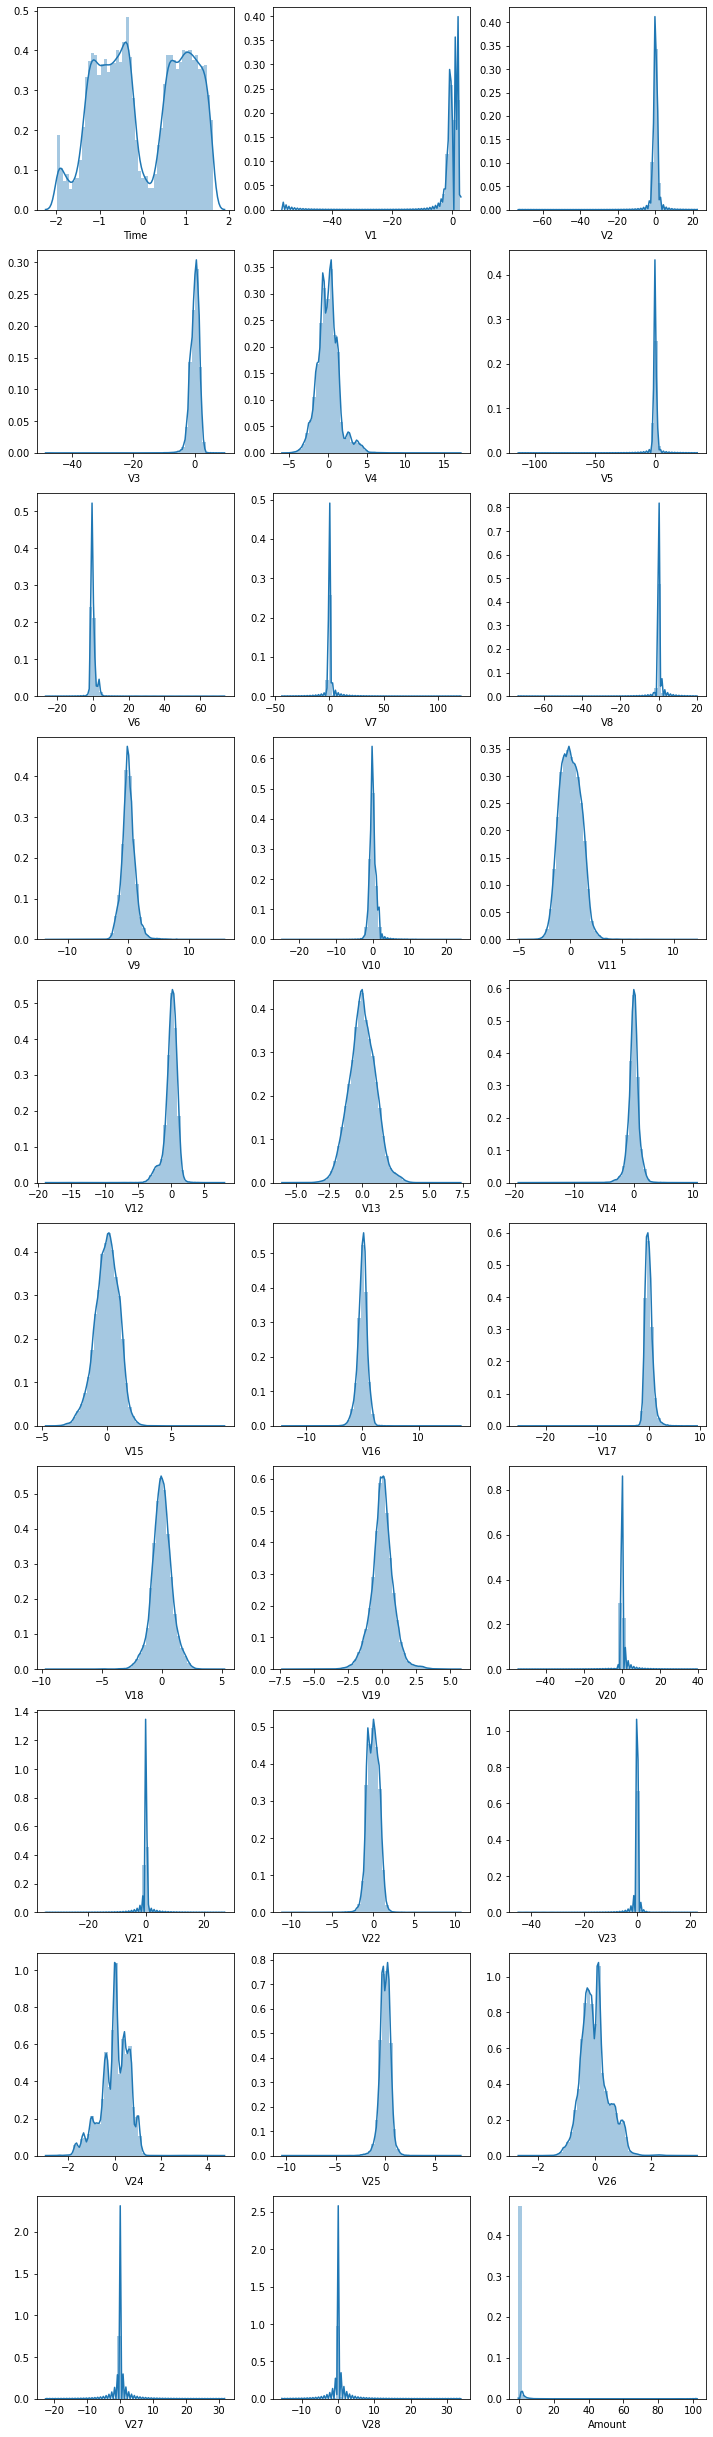

In [8]:
graph_features()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import random


normal_idx = df[df.Class == 0].index
fraud_idx = df[df.Class == 1].index

normal_idx_sample = random.sample(list(normal_idx), 492)
df_0 = df.iloc[normal_idx_sample, :]
df_1 = df.iloc[fraud_idx, :]

sample_idx = np.concatenate((normal_idx_sample, fraud_idx))
df_sample = df.iloc[sample_idx, :]
XtrSample, XvaSample, YtrSample, YvaSample = train_test_split(df_sample.drop('Class', axis=1), 
                                                    df_sample['Class'], test_size = 0.2)
XvaSample = pd.concat((XvaSample, df.iloc[np.setdiff1d(range(df.shape[0]), sample_idx), :].drop('Class', axis=1)))
YvaSample = pd.concat((YvaSample, df.iloc[np.setdiff1d(range(df.shape[0]), sample_idx), :]['Class']))

train_idx = shuffle(np.concatenate((random.sample(list(normal_idx), int(np.floor(normal_idx.size*.85))),
                           random.sample(list(fraud_idx), int(np.floor(fraud_idx.size*.85))))))
val_idx = shuffle(np.setdiff1d(range(df.shape[0]), train_idx))

df_train = df.iloc[train_idx, :]
df_val = df.iloc[val_idx, :]

Xtr = df_train.drop('Class', axis=1)
Ytr = df_train['Class']
Xva = df_val.drop('Class', axis=1)
Yva = df_val['Class']

X = pd.concat([Xtr, Xva])
Y = pd.concat([Ytr, Yva])
Xsample = pd.concat([XtrSample, XvaSample])
Ysample = pd.concat([YtrSample, YvaSample])

print(Xtr.shape)
print(Ytr.shape)
print(Xva.shape)
print(Yva.shape)

kf = KFold(shuffle=False)

(242085, 30)
(242085,)
(42722, 30)
(42722,)


### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

# Cs = [1e-6, 5e-6, 1e-5, 5e-5, 1e-4]

# for c in Cs:
#     lr = LogisticRegression(C=c, max_iter = 500)
#     lr.fit(XtrSample, YtrSample)
#     print('f1-score:', f1_score(y_true=YvaSample, y_pred=lr.predict(XvaSample)))

lr = LogisticRegression(C=5e-5, max_iter=500)
lr.fit(XtrSample, YtrSample)
print('AUC:', roc_auc_score(YvaSample, lr.predict_proba(XvaSample)[:,1]))
print('f1-score:', f1_score(y_true=YvaSample, y_pred=lr.predict(XvaSample)))
print('accuracy:', accuracy_score(Yva, lr.predict(Xva)))

AUC: 0.9801428266432
f1-score: 0.642570281124498
accuracy: 0.9994382285473526


In [97]:
# Cs = [3e-8, 5e-8, 7e-8, 1e-7, 3e-7]
# for c in Cs:
#     lr2 = LogisticRegression(C=c, max_iter=1000, class_weight='balanced')
#     lr2.fit(Xtr, Ytr)
#     print(c, 'f1-score:', f1_score(Yva, lr2.predict(Xva)))
#     print('accuracy:', accuracy_score(Yva, lr2.predict(Xva)))
    
lr2 = LogisticRegression(C=1e-7, max_iter=1000, class_weight='balanced')
lr2.fit(Xtr, Ytr)
print('AUC:', roc_auc_score(Yva, lr2.predict_proba(Xva)[:,1]))
print('f1-score:', f1_score(Yva, lr2.predict(Xva)))
print('accuracy:', accuracy_score(Yva, lr2.predict(Xva)))

AUC: 0.9832193265296811
f1-score: 0.8356164383561645
accuracy: 0.9994382285473526


In [105]:
XtrPoly = PolynomialFeatures(2).fit_transform(Xtr)
XvaPoly = PolynomialFeatures(2).fit_transform(Xva)

In [ ]:
Cs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, .1]
for c in Cs:
    lr3 = LogisticRegression(penalty='l1', solver='saga', C=c, max_iter=1000, class_weight='balanced')
    lr3.fit(XtrPoly, Ytr)
    print(c, 'f1-score:', f1_score(Yva, lr3.predict(XvaPoly)))
# print('AUC:', roc_auc_score(Yva, lr3.predict_proba(XvaPoly)[:,1]))
# print('f1-score:', f1_score(Yva, lr3.predict(XvaPoly)))
# print('accuracy:', accuracy_score(Yva, lr3.predict(XvaPoly)))

### Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
# for depth in max_depths:
#     rf = RandomForestClassifier(n_estimators=100, max_depth=depth, 
#                                 min_samples_leaf=4, min_samples_split = 4, max_features=5)
#     rf.fit(XtrSample, YtrSample)
#     print(depth, 'AUC:', roc_auc_score(Yva, rf.predict_proba(Xva)[:,1]))
rf = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced',
                            min_samples_leaf=4, min_samples_split = 4, max_features=5)
rf.fit(Xtr, Ytr)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=200)

In [109]:
print('AUC:', roc_auc_score(Yva, rf.predict_proba(Xva)[:,1]))
print('f1-score:', f1_score(Yva, rf.predict(Xva)))
print('accuracy:', accuracy_score(Yva, rf.predict(Xva)))

AUC: 0.9760661759114208
f1-score: 0.8671328671328672
accuracy: 0.9995552642666542


### SVC

In [40]:
from sklearn.svm import SVC

XtrSVC = Xtr[:Xtr.shape[0]//30]
YtrSVC = Ytr[:Ytr.shape[0]//30]

In [41]:
Cs = [.002, .003, .004]
gammas = [5e-4, 7e-4, 9e-4]
for c in Cs:
    for gamma in gammas:
        svc = SVC(C=c, gamma=gamma, class_weight='balanced')
        svc.fit(XtrSVC, YtrSVC)
        print(c, gamma, 'f1-score:', f1_score(Yva, svc.predict(Xva)))
        print('\taccuracy:', accuracy_score(Yva, svc.predict(Xva)))

0.002 0.0005 f1-score: 0.7313432835820896
	accuracy: 0.999157342821029
0.002 0.0007 f1-score: 0.7943262411347517
	accuracy: 0.9993211928280511
0.002 0.0009 f1-score: 0.8111888111888113
	accuracy: 0.9993680071157718
0.003 0.0005 f1-score: 0.8111888111888113
	accuracy: 0.9993680071157718
0.003 0.0007 f1-score: 0.8111888111888113
	accuracy: 0.9993680071157718
0.003 0.0009 f1-score: 0.7785234899328859
	accuracy: 0.99922756425261
0.004 0.0005 f1-score: 0.8111888111888113
	accuracy: 0.9993680071157718
0.004 0.0007 f1-score: 0.7712418300653594
	accuracy: 0.9991807499648893
0.004 0.0009 f1-score: 0.7466666666666667
	accuracy: 0.9991105285333084


In [39]:
svc = SVC(C=.003, gamma=7e-4, class_weight='balanced')
svc.fit(XtrSVC, YtrSVC)
print(c, gamma, 'f1-score:', f1_score(Yva, svc.predict(Xva)))
print('\taccuracy:', accuracy_score(Yva, svc.predict(Xva)))

0.003 0.0007 f1-score: 0.8111888111888113
	accuracy: 0.9993680071157718


### Gradient Boost

In [122]:
from lightgbm import LGBMClassifier

In [126]:
# num_leaves = [1000]
# min_child_samples = [8,10,12]
# for n in num_leaves:
#     for m in min_child_samples:
#         lgbm = LGBMClassifier(num_leaves=n, learning_rate=0.01, min_child_samples=m, n_estimators=500)
#         lgbm.fit(Xtr, Ytr)
#         print('f1-score:', f1_score(Yva, lgbm.predict(Xva)))

f1-score: 0.8905109489051095
f1-score: 0.8823529411764706
f1-score: 0.8823529411764706


In [127]:
lgbm = LGBMClassifier(num_leaves=1000, learning_rate=0.01, min_child_samples=8, n_estimators=1000)
lgbm.fit(Xtr, Ytr)
print('f1-score:', f1_score(Yva, lgbm.predict(Xva)))

f1-score: 0.8920863309352518


### Neural Network

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [115]:
nn = Sequential()
nn.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(Xtr.shape[1],)))
nn.add(Dense(1, activation='sigmoid'))
# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
nn.fit(Xtr, Ytr, epochs=200, batch_size=128, verbose=2,class_weight={0:492/284807, 1:284315/284807})

Epoch 1/200
1892/1892 - 6s - loss: 6.7761e-04 - accuracy: 0.9564
Epoch 2/200
1892/1892 - 4s - loss: 4.5232e-04 - accuracy: 0.9747
Epoch 3/200
1892/1892 - 4s - loss: 4.0987e-04 - accuracy: 0.9789
Epoch 4/200
1892/1892 - 4s - loss: 3.3966e-04 - accuracy: 0.9779
Epoch 5/200
1892/1892 - 4s - loss: 3.0477e-04 - accuracy: 0.9790
Epoch 6/200
1892/1892 - 4s - loss: 2.7565e-04 - accuracy: 0.9784
Epoch 7/200
1892/1892 - 4s - loss: 2.4965e-04 - accuracy: 0.9816
Epoch 8/200
1892/1892 - 4s - loss: 2.3163e-04 - accuracy: 0.9794
Epoch 9/200
1892/1892 - 4s - loss: 1.9557e-04 - accuracy: 0.9843
Epoch 10/200
1892/1892 - 4s - loss: 1.9328e-04 - accuracy: 0.9814
Epoch 11/200
1892/1892 - 4s - loss: 1.6993e-04 - accuracy: 0.9855
Epoch 12/200
1892/1892 - 3s - loss: 1.6020e-04 - accuracy: 0.9849
Epoch 13/200
1892/1892 - 4s - loss: 1.5193e-04 - accuracy: 0.9845
Epoch 14/200
1892/1892 - 4s - loss: 1.2935e-04 - accuracy: 0.9866
Epoch 15/200
1892/1892 - 4s - loss: 1.3193e-04 - accuracy: 0.9864
Epoch 16/200
1892/1

Epoch 125/200
1892/1892 - 5s - loss: 7.5431e-05 - accuracy: 0.9978
Epoch 126/200
1892/1892 - 5s - loss: 6.1695e-05 - accuracy: 0.9979
Epoch 127/200
1892/1892 - 4s - loss: 7.3016e-05 - accuracy: 0.9983
Epoch 128/200
1892/1892 - 4s - loss: 4.1880e-05 - accuracy: 0.9982
Epoch 129/200
1892/1892 - 6s - loss: 1.3055e-04 - accuracy: 0.9972
Epoch 130/200
1892/1892 - 6s - loss: 8.3408e-05 - accuracy: 0.9970
Epoch 131/200
1892/1892 - 5s - loss: 6.5708e-05 - accuracy: 0.9981
Epoch 132/200
1892/1892 - 6s - loss: 6.0942e-05 - accuracy: 0.9986
Epoch 133/200
1892/1892 - 5s - loss: 7.0643e-05 - accuracy: 0.9984
Epoch 134/200
1892/1892 - 5s - loss: 1.3545e-04 - accuracy: 0.9975
Epoch 135/200
1892/1892 - 6s - loss: 7.4328e-05 - accuracy: 0.9983
Epoch 136/200
1892/1892 - 5s - loss: 5.6551e-05 - accuracy: 0.9984
Epoch 137/200
1892/1892 - 5s - loss: 2.2796e-04 - accuracy: 0.9984
Epoch 138/200
1892/1892 - 4s - loss: 9.3455e-05 - accuracy: 0.9982
Epoch 139/200
1892/1892 - 5s - loss: 7.8210e-05 - accuracy: 0.

In [116]:
print('AUC:', roc_auc_score(Yva, nn.predict_proba(Xva)))
print('f1-score:', f1_score(Yva, nn.predict_classes(Xva)))
print('accuracy:', accuracy_score(Yva, nn.predict_classes(Xva)))

c:\users\sshim\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC: 0.9625922700978975


c:\users\sshim\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


f1-score: 0.5555555555555555


c:\users\sshim\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy: 0.9975656570385282


### Summary

In [128]:
print("Gradient Boosting:")
print('\tAUC:', roc_auc_score(Yva, lgbm.predict_proba(Xva)[:,1]))
print('\tf1-score:', f1_score(Yva, lgbm.predict(Xva)))
print('\taccuracy:', accuracy_score(Yva, lgbm.predict(Xva)))
print("Random Forest:")
print('\tAUC:', roc_auc_score(Yva, rf.predict_proba(Xva)[:,1]))
print('\tf1-score:', f1_score(Yva, rf.predict(Xva)))
print('\taccuracy:', accuracy_score(Yva, rf.predict(Xva)))
print('Logistic Regression:')
print('\tAUC:', roc_auc_score(YvaSample, lr.predict_proba(XvaSample)[:,1]))
print('\tf1-score:', f1_score(y_true=YvaSample, y_pred=lr.predict(XvaSample)))
print('\taccuracy:', accuracy_score(Yva, lr.predict(Xva)))
print('Support Vector Classifier:')
print('\tf1-score:', f1_score(Yva, svc.predict(Xva)))
print('\taccuracy:', accuracy_score(Yva, svc.predict(Xva)))

Gradient Boosting:
	AUC: 0.987853427428554
	f1-score: 0.8920863309352518
	accuracy: 0.9996488928420955
Random Forest:
	AUC: 0.9760661759114208
	f1-score: 0.8671328671328672
	accuracy: 0.9995552642666542
Logistic Regression:
	AUC: 0.9801428266432
	f1-score: 0.642570281124498
	accuracy: 0.9994382285473526
Support Vector Classifier:
	f1-score: 0.8108108108108109
	accuracy: 0.9993445999719114
